In [4]:
#IMPORTING NECESSARY MODULES AND SETTING GRAPH PARAMETERS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)
pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


In [5]:
#IMPORTING DATA
df=pd.read_csv('data/VT-clean.csv',index_col='id',low_memory=False)
#print(df.head())
#print(df.info())

In [6]:
#TAKING ONLY THE NECESSARY COLUMNS TO THIS INVESTIGATION
df_clean=df[['state','stop_date','stop_time','location_raw','county_name','county_fips','fine_grained_location','police_department','driver_gender','driver_age','driver_race','violation','search_conducted','search_type','contraband_found','stop_outcome','is_arrested','officer_id']]
#print(df_clean.head())
#print(df_clean.info())

Questions to be investigated:

1)When are stops most likely to occur?

2)Which gender is pulled over more often?

3)which race is pulled over more often?

4)what gender/race is most likely to get off with a warning?

5)what age is most likely to get off with a warning


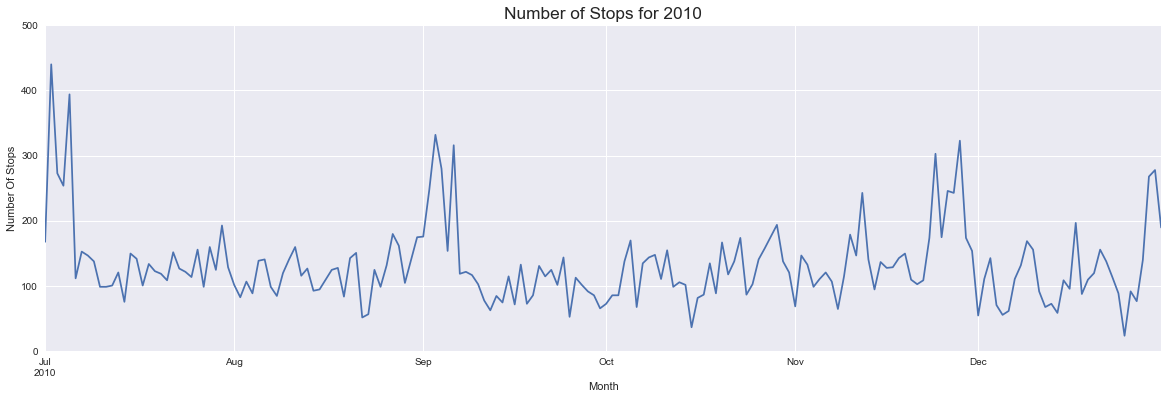

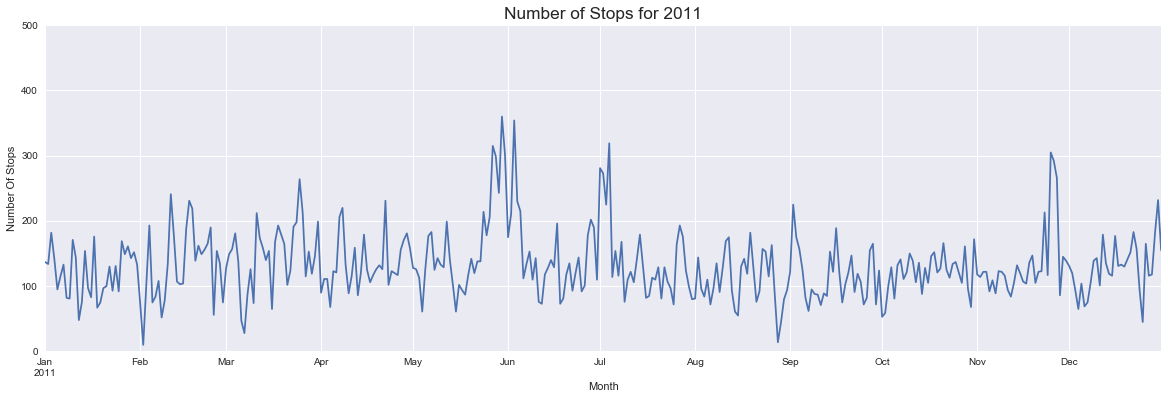

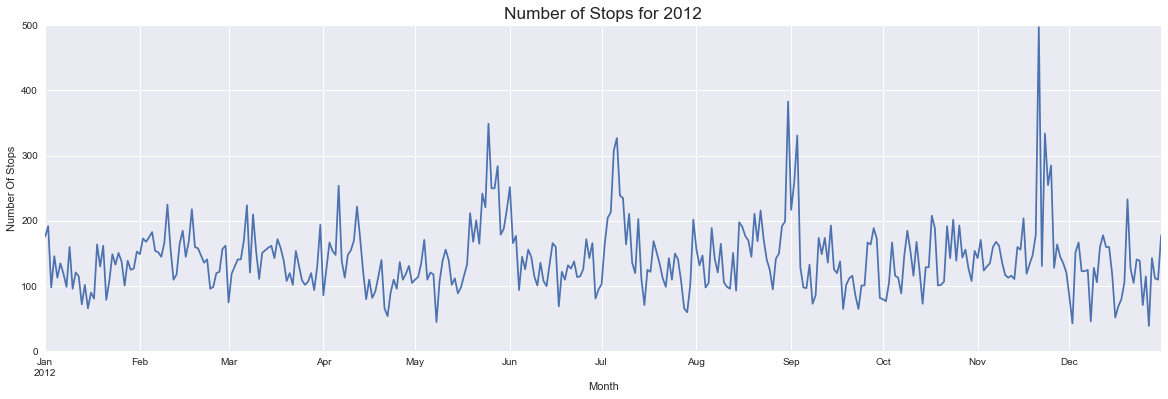

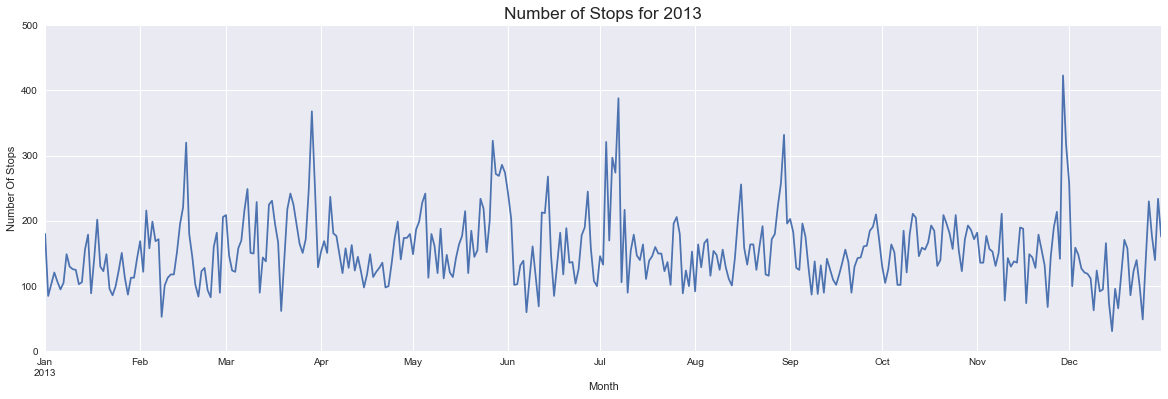

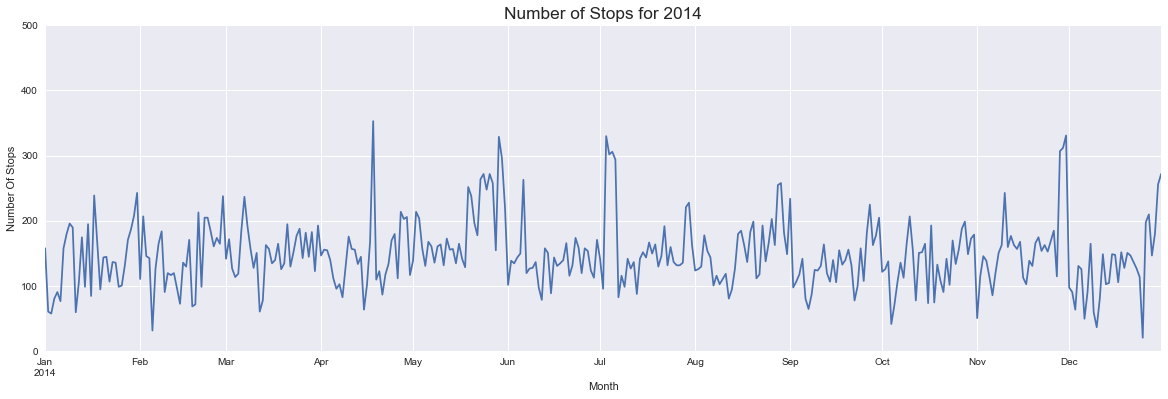

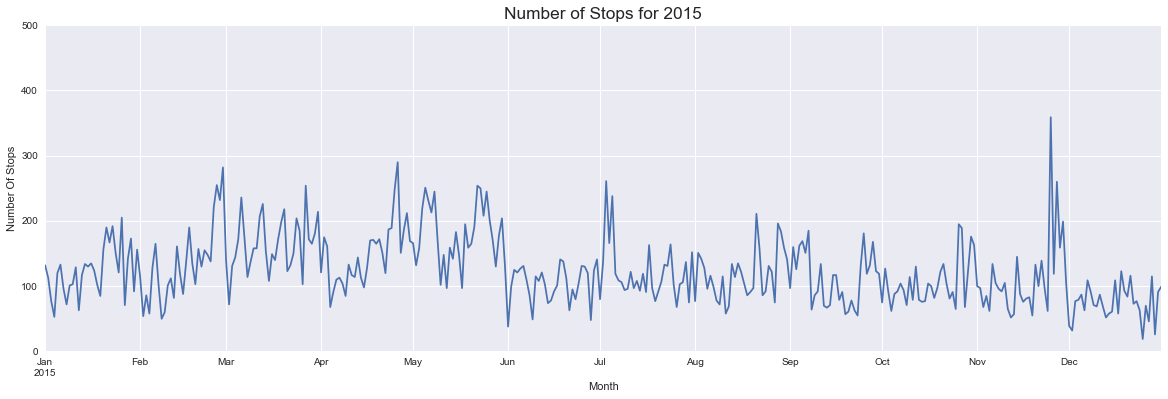

In [7]:
#GRABBING ONLY THE COLUMNS THAT I WANT FROM THE IMPORTED DATA FRAME
df_clean=df[['state','stop_date','stop_time','location_raw','county_name','county_fips','fine_grained_location','police_department','driver_gender','driver_age','driver_race','violation','search_conducted','search_type','contraband_found','stop_outcome','is_arrested','officer_id']]

#GROUPING BY STOP DATE AND DRIVER GENDER
df_count_gender=df_clean.groupby(['stop_date','driver_gender']).count()

#SELECTING ONLY THE STATE BECAUSE THE STATE COLUMN HAS NO EMPTY VALUES
df_count_gender=df_count_gender['state']

#UNSTACKING TO ALLOW FOR RESAMPLING
df_count_gender=df_count_gender.unstack(level=-1)

#MAKING THE INDEX A DATETIME OBJECT
df_count_gender.index = pd.to_datetime(df_count_gender.index)

#CREATING A TOTAL COLUMN
df_count_gender['total']=df_count_gender['F']+df_count_gender['M']

#print(df_count_gender.head())

#RESAMPLING FOR MONTHLY
df_count_monthly=df_count_gender.resample('M').sum()
#print(df_count_monthly.head())

#RESAMPLING FOR YEARLY
df_count_yearly=df_count_gender.resample('A').sum()

#CHANING AXIS VALUES
df_count_yearly.index=df_count_yearly.index.year
#print(df_count_yearly.head())

#GRAPHING NUMBER OF STOPS OVER TIME
#SETTING GRAPH LOCATION PRAMETER
x=1

#GRABBING ONlY TOTAL COLUMN
df_total=df_count_gender['total']

#ITERATING THROUGH UNIQUE YEARS TO GRAPH YEARLY STOP COUNTS
for year in df_total.index.year.unique():
    
    temp=str(year)
    #SETTING NEW AREA
    plt.figure(x)
    
    #MAKING LINE GRAPH
    df_total[temp].plot(kind='line')
    
    #SETTING LABELS AND Y RANGE
    plt.xlabel('Month')
    plt.ylabel('Number Of Stops')
    plt.title('Number of Stops for '+temp,size='xx-large',)
    plt.ylim(0,500)
    x+=1
    

plt.show()

From the five graphs above of number of stops through out the year for 2010-2015 we can see signficant spikes that reoccur each year. These spikes correspond to major holidays.

Late May : Memorial Day

Early July: 4th of July

Early September : Labor Day

Late November: Thanksgiving

Suprisingly though, there seems to be either no noticable spike or a signficant drop in stops around christmas time.  

There also seems to be no constant increase over each month or large spikes at the end of each month.  There is a common held belief that cops are more actively stopping people at the end of each month to be able to reach their quota.  However, this data does not support this, and the following graph of a few months in particular confirm that observation

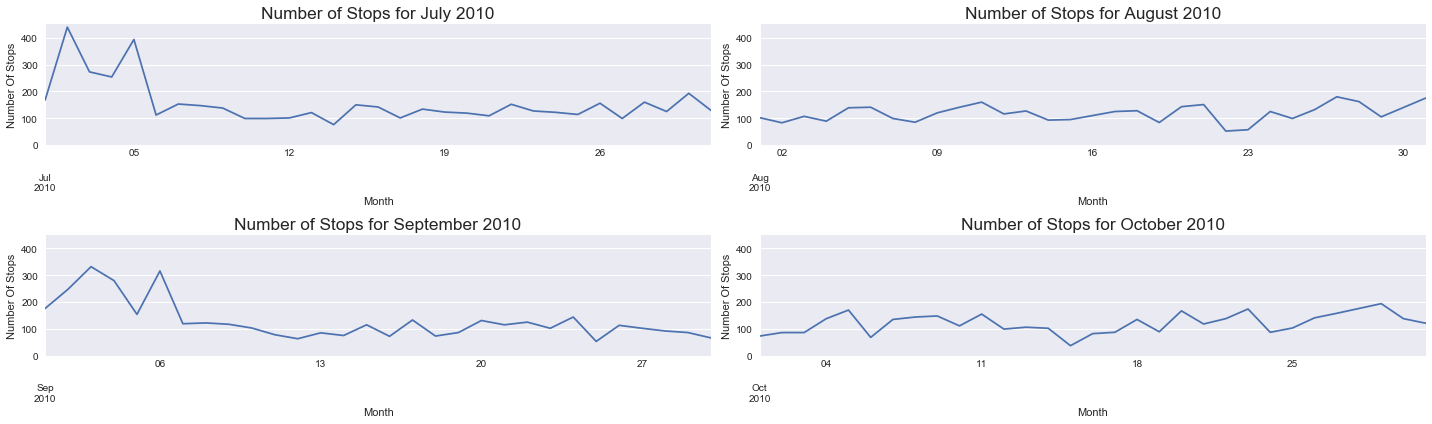

In [8]:
#GRAPHING A FEW MONTHS TO CONFIRM AFOREMENTIONED IDEA

#JULY 2010
plt.subplot(2,2,1)
df_total['2010-July'].plot()
plt.xlabel('Month')
plt.ylabel('Number Of Stops')
plt.title('Number of Stops for July 2010',size='xx-large',)
plt.ylim(0,450)

#AUGUST 2010
plt.subplot(2,2,2)
df_total['2010-August'].plot()
plt.xlabel('Month')
plt.ylabel('Number Of Stops')
plt.title('Number of Stops for August 2010',size='xx-large',)
plt.ylim(0,450)

#SEPTEMBER 2010
plt.subplot(2,2,3)
df_total['2010-September'].plot()
plt.xlabel('Month')
plt.ylabel('Number Of Stops')
plt.title('Number of Stops for September 2010',size='xx-large',)
plt.ylim(0,450)

#SEP
plt.subplot(2,2,4)
df_total['2010-OCTOBER'].plot()
plt.xlabel('Month')
plt.ylabel('Number Of Stops')
plt.title('Number of Stops for October 2010',size='xx-large',)
plt.ylim(0,450)

plt.tight_layout()
plt.show()

As we see above there is no observable trend to the monthly data. Next I investigate which gender is pulled over the most. To do so, I take the data with male vs female number of stops per year, and use a bar graph to show their relative amounts

driver_gender      M      F
stop_date                  
2010           15551   8803
2011           30990  17320
2012           33084  19221
2013           36226  20590
2014           34858  19490
2015           28969  16471


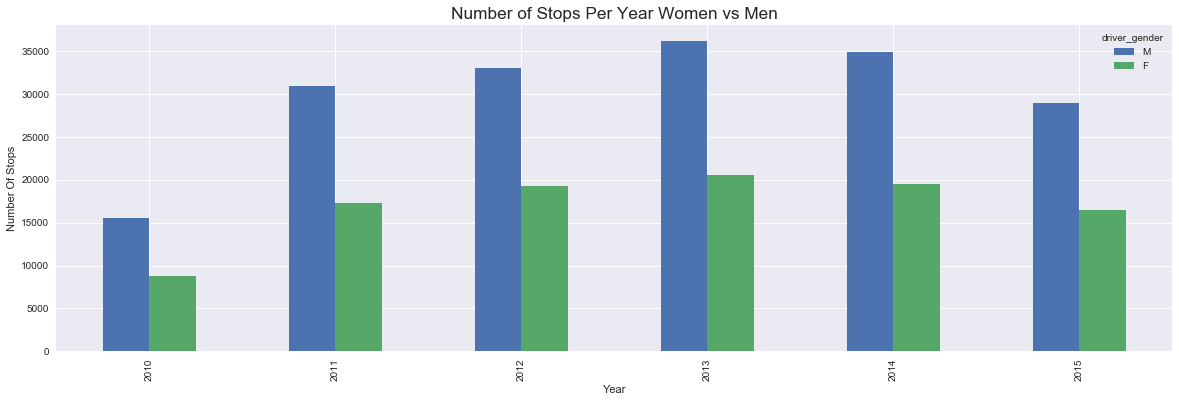

In [9]:
#AFFECT OF GENDER ON NUMBER OF STOPS

#PRINT DATA SET
#print(df_count_yearly[['M','F']])

#SHOW BAR GRAPH OF YEARLY COUNT OF STOP
df_count_yearly[['M','F']].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number Of Stops')
plt.title('Number of Stops Per Year Women vs Men',size='xx-large',)
plt.show()

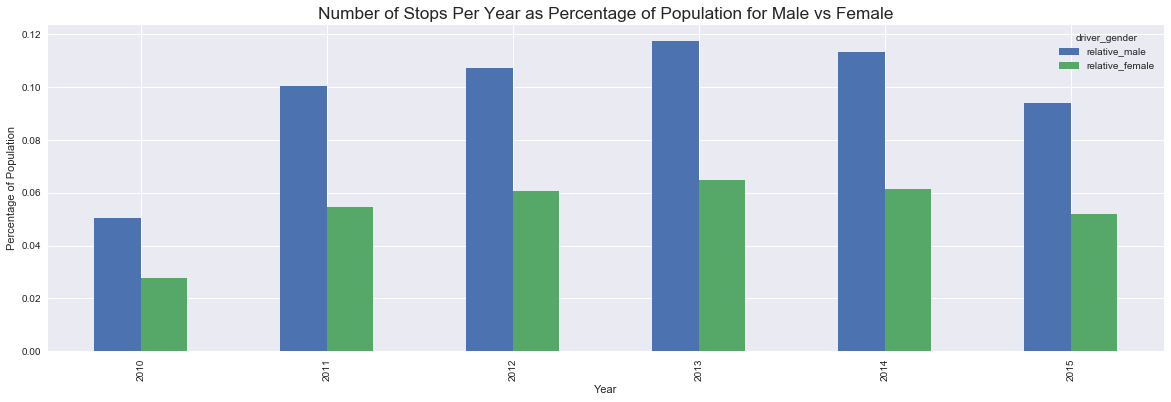

In [10]:
#NUMBER OF STOPS RELATIVE TO POPULATION FOR EACH GENDER

#MANUALLY FILLING IN VALUES FROM US CENSUS BUREAU AND CREATING NEW COLUMNS
df_count_yearly['female_percentage']=0.507
df_count_yearly.set_value(2015,'female_percentage',0.506)
df_count_yearly['male_percentage']=1-df_count_yearly['female_percentage']
df_count_yearly.set_value(2010,'total_population',625741)
df_count_yearly.set_value(2015,'total_population',624594)
df_count_yearly=df_count_yearly.interpolate()
df_count_yearly['relative_female']=df_count_yearly['F']/(df_count_yearly['female_percentage']*df_count_yearly['total_population'])
df_count_yearly['relative_male']=df_count_yearly['M']/(df_count_yearly['male_percentage']*df_count_yearly['total_population'])
#print(df_count_yearly)

#GRAPHING 
df_count_yearly[['relative_male','relative_female']].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Number of Stops Per Year as Percentage of Population for Male vs Female',size='xx-large',)
plt.show()



From the above graph we can see that our observation holds true that men are pulled over more often than women when population demographics are considered. 

Now I investigate how nationality affects pull over rate. Knowing ahead of time that the percentage of population of each nationality is not equal, I will take percentage of the population into account immediately

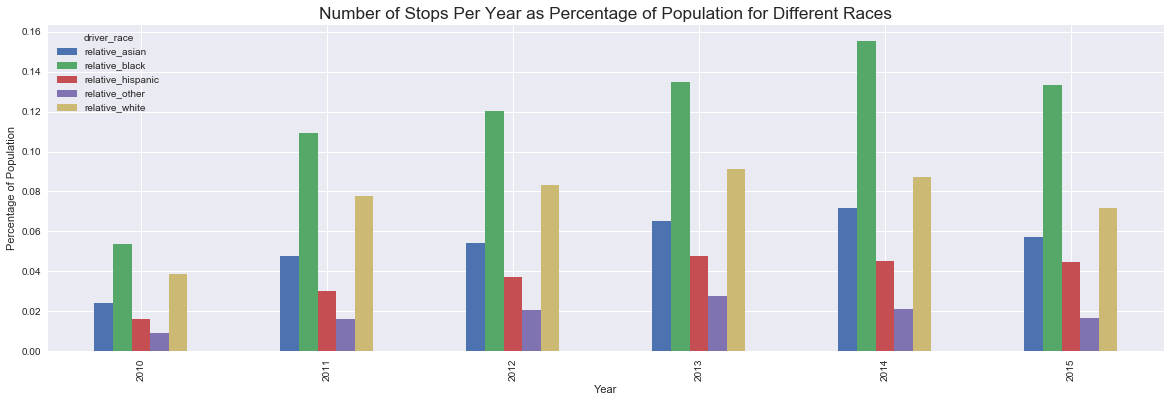

In [11]:
#GROUPING BY STOP DATE AND DRIVER RACE
df_count_race=df_clean.groupby(['stop_date','driver_race']).count()

#SELECTING ONLY THE STATE BECAUSE THE STATE COLUMN HAS NO EMPTY VALUES
df_count_race=df_count_race['state']

#UNSTACKING TO ALLOW FOR RESAMPLING
df_count_race=df_count_race.unstack(level=-1)

#MAKING THE INDEX A DATETIME OBJECT
df_count_race.index = pd.to_datetime(df_count_race.index)

#RESAMPLING FOR YEARLY
df_count_race_yearly=df_count_race.resample('A').sum()

#CHANING AXIS VALUES
df_count_race_yearly.index=df_count_race_yearly.index.year
#print(df_count_yearly.head())


#SETTING VALUES FOR RACE PERCENTAGE AND RELATIVE STOP AMOUNTS FOR EACH RACE
df_count_race_yearly['asian_percentage']=0.018
df_count_race_yearly['black_percentage']=0.013
df_count_race_yearly['hispanic_percentage']=0.019
df_count_race_yearly['white_percentage']=0.946
df_count_race_yearly['other_percentage']=1-(df_count_race_yearly['asian_percentage']+df_count_race_yearly['black_percentage']+df_count_race_yearly['hispanic_percentage']+df_count_race_yearly['white_percentage'])
df_count_race_yearly.set_value(2010,'total_population',625741)
df_count_race_yearly.set_value(2015,'total_population',624594)
df_count_race_yearly=df_count_race_yearly.interpolate()
df_count_race_yearly['relative_asian']=df_count_race_yearly['Asian']/(df_count_race_yearly['asian_percentage']*df_count_race_yearly['total_population'])
df_count_race_yearly['relative_black']=df_count_race_yearly['Black']/(df_count_race_yearly['black_percentage']*df_count_race_yearly['total_population'])
df_count_race_yearly['relative_hispanic']=df_count_race_yearly['Hispanic']/(df_count_race_yearly['hispanic_percentage']*df_count_race_yearly['total_population'])
df_count_race_yearly['relative_other']=df_count_race_yearly['Other']/(df_count_race_yearly['other_percentage']*df_count_race_yearly['total_population'])
df_count_race_yearly['relative_white']=df_count_race_yearly['White']/(df_count_race_yearly['white_percentage']*df_count_race_yearly['total_population'])

#GRAPHING
df_count_race_yearly[['relative_asian','relative_black','relative_hispanic','relative_other','relative_white']].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Number of Stops Per Year as Percentage of Population for Different Races',size='xx-large',)
plt.show()

#print(df_count_race_yearly.head())

From the above graph, we can see that black people are most likely to be pulled over, folled by white people, other, hispanic, and then asian.  Now we investigate what type of person is most likely to 'get away' with something.  This is represented by any stop in which a written warning or a verbal warning is given, I then compare this number to total number of stops.

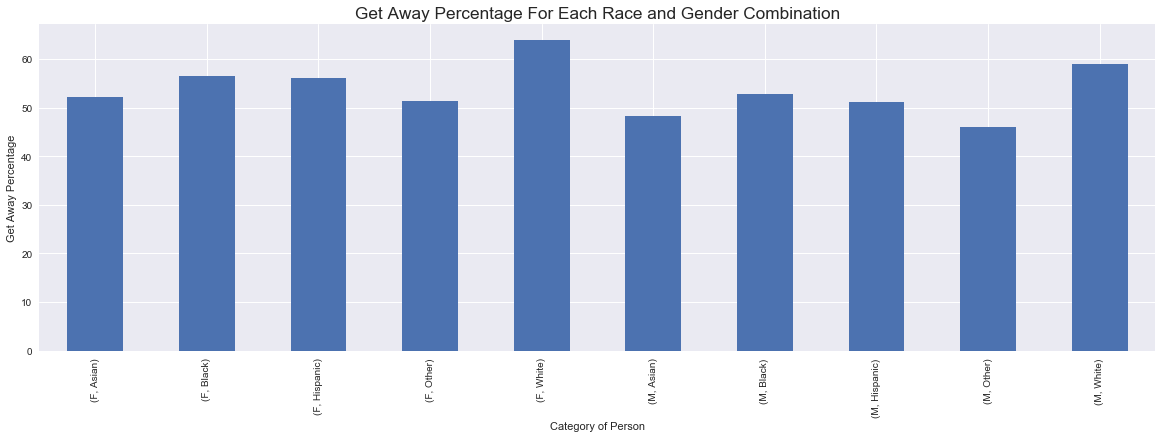

In [17]:
#COPYING OF CLEAN DATA SET
df_got_away=df_clean.copy()

#SETTING COLUMNS FOR NO PUNISHMENT
df_got_away['no_punishment']=(df_got_away['stop_outcome']=='Written Warning') | (df_got_away['stop_outcome']=='Verbal Warning')

#SETTING COUNT FOR TOTAL
df_got_away['total']=1.0

#GROUPING BY DRIVER GENDER AND DRIVER RACE
df_got_away=df_got_away.groupby(['driver_gender','driver_race']).sum()

#GRABBING ONLY THE COLUMNS OF INTEREST, NO PUNISHMENT AND TOTAL
df_got_away=df_got_away[['no_punishment','total']]

#FILLING NAN VALUES WITH 0
df_got_away=df_got_away.fillna(value=0)

#SETTING PERCENTAGE BY DIVIDING NO PUNISHMENT BY TOTAL FOR EACH CATEGORY, IE. BLACK WOMAN
df_got_away['got_away_percentage']=df_got_away['no_punishment']/df_got_away['total']*100

#GRABBING THE COLUMN OF INTEREST, GOT AWAY PERCENTAGE
df_got_away=df_got_away['got_away_percentage']

#PLOTTING
df_got_away.plot(kind='bar')
plt.xlabel('Category of Person')
plt.ylabel('Get Away Percentage')
plt.title('Get Away Percentage For Each Race and Gender Combination',size='xx-large',)
plt.show()
                                

From the above bar graph we can notice a few interesting things.

Women are more likely for each race to get off with a warning,  White people are most likely to get off with a warning and other are least likely to get off.  

Now I investigate how age plays into getting off with a warning by graphing only age vs get off percentage for white women.

driver_age
15.0      21.0
16.0     357.0
17.0    1196.0
18.0    2182.0
19.0    2862.0
20.0    3190.0
21.0    3178.0
22.0    3425.0
23.0    3210.0
24.0    3106.0
25.0    2891.0
26.0    2755.0
27.0    2611.0
28.0    2547.0
29.0    2452.0
30.0    2226.0
31.0    2218.0
32.0    2143.0
33.0    1921.0
34.0    1904.0
35.0    1767.0
36.0    1738.0
37.0    1737.0
38.0    1633.0
39.0    1664.0
40.0    1645.0
41.0    1703.0
42.0    1667.0
43.0    1729.0
44.0    1758.0
         ...  
68.0     494.0
69.0     434.0
70.0     378.0
71.0     290.0
72.0     297.0
73.0     250.0
74.0     195.0
75.0     200.0
76.0     167.0
77.0     147.0
78.0     121.0
79.0     109.0
80.0      93.0
81.0      90.0
82.0      75.0
83.0      64.0
84.0      46.0
85.0      41.0
86.0      33.0
87.0      28.0
88.0      18.0
89.0      11.0
90.0      13.0
91.0       5.0
92.0       1.0
94.0       2.0
95.0       1.0
96.0       1.0
98.0       1.0
99.0       1.0
Name: total, Length: 83, dtype: float64


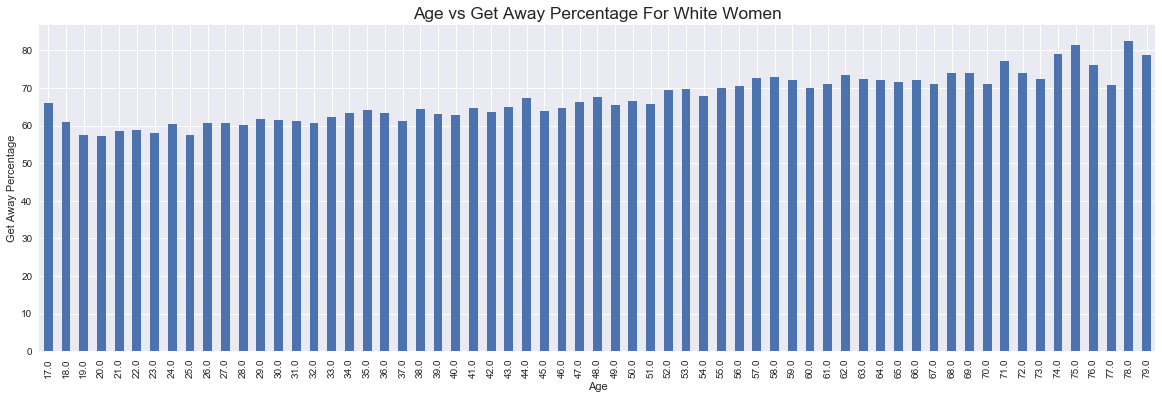

In [27]:
#COPYING OF CLEAN DATA SET
df_got_away=df_clean.copy()

#SETTING COLUMNS FOR NO PUNISHMENT
df_got_away['no_punishment']=(df_got_away['stop_outcome']=='Written Warning') | (df_got_away['stop_outcome']=='Verbal Warning')

#SETTING COUNT FOR TOTAL
df_got_away['total']=1.0

#GROUPING BY DRIVER GENDER, DRIVER RACE, AND DRIVER AGE
df_got_away=df_got_away.groupby(['driver_gender','driver_race','driver_age']).sum()

#PRINTING TOTAL STOPS FOR EACH AGE FOR WHITE WOMEN TO SEE WHICH AGES HAVE SIGNFICANT ENOUGH PULL OVERS
print(df_got_away['total']['F']['White'])

#GRABBING ONLY THE COLUMNS OF INTEREST, NO PUNISHMENT AND TOTAL
df_got_away=df_got_away[['no_punishment','total']]

#FILLING NAN VALUES WITH 0
df_got_away=df_got_away.fillna(value=0)

#SETTING PERCENTAGE BY DIVIDING NO PUNISHMENT BY TOTAL FOR EACH CATEGORY, IE. BLACK WOMAN
df_got_away['got_away_percentage']=df_got_away['no_punishment']/df_got_away['total']*100

#GRABBING THE COLUMN OF INTEREST, GOT AWAY PERCENTAGE
df_got_away=df_got_away['got_away_percentage']

#GRABBING THE CATEGORY OF INTEREST, WHITE WOMEN
df_got_away=df_got_away['F']['White']

#SELECTING ONLY THE AGES WITH > 100 INSTANCES
df_got_away=df_got_away.loc[17.0:79.0]

#PLOTTING
df_got_away.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Get Away Percentage')
plt.title('Age vs Get Away Percentage For White Women',size='xx-large',)
plt.show()
           


From this bar graph we can see that get away percentage increases steadily with age, counter to what I would assume with younger people more likely to get off with a warning.  